In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
data = pd.read_csv('BigMartSalesData.csv')

In [4]:
data.shape

(541874, 12)

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


### Question 1: Plot Total Sales Per Month for Year 2011. How the total sales have increased over months in Year 2011. Which month has lowest Sales?

In [15]:
data['Year'].value_counts()

2011    499395
2010     42479
Name: Year, dtype: int64

In [26]:
data_1 = data[data['Year'] == 2011].filter(['Month','Amount']).groupby(['Month'],as_index=False).sum()
data_1

,Month,Amount
0,1,822669.640
1,2,549134.460
2,3,752003.310
3,4,582318.451
4,5,817655.200
5,6,832231.670
6,7,757108.941
7,8,791173.020
8,9,1097467.722
9,10,1239237.260


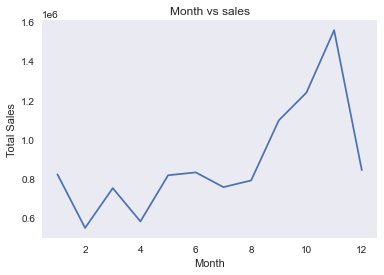

In [34]:
# bar plot:
plt.plot(data_1['Month'],data_1['Amount'])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Month vs sales")
plt.grid()
plt.show()
plt.show()

In [31]:
# observations:
# The sales have increased from january to november but decreased in december.
# Febrauary month has lower sales

### Question 2: Plot Total Sales Per Month for Year 2011 as Bar Chart. Is Bar Chart Better to visualize than Simple Plot?

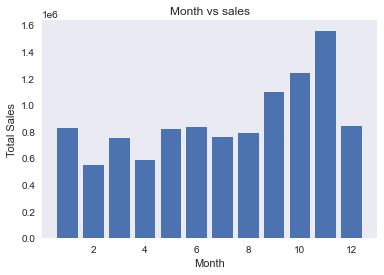

In [35]:
# bar plot:
plt.bar(x=data_1['Month'],height=data_1['Amount'])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Month vs sales")
plt.grid()
plt.show()
plt.show()

In [36]:
# The normal plot gives best trend compared to barplot

### Question 3: Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales?

In [3]:
data['Country'].nunique()

38

In [6]:
data2 = data[data['Year'] == 2011].filter(['Country','Amount']).groupby(['Country'],as_index=False).sum()
data2

,Country,Amount
0,Australia,1.389047e+05
1,Austria,9.945680e+03
2,Bahrain,7.541400e+02
3,Belgium,3.967181e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.045106e+04
7,Cyprus,1.264365e+04
8,Czech Republic,9.457600e+02
9,Denmark,1.786104e+04


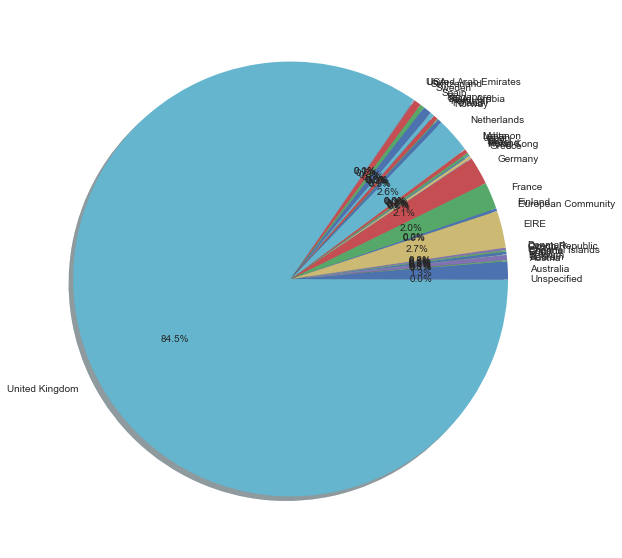

In [11]:
plt.figure(figsize=(10,10))
plt.pie(data2['Amount'],labels=data2['Country'],shadow=True,autopct='%1.1f%%')
plt.tight_layout
plt.show()

In [12]:
# United kingdom has majority of the sales accounting for 84.5% of the total sales.

### 4. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range most of the invoice amounts are concentrated  

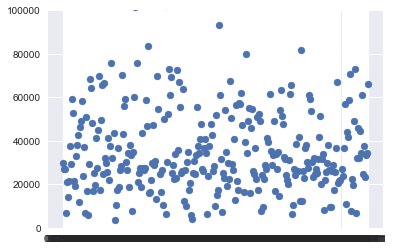

In [18]:
invoice_amounts = data.filter(["InvoiceDate", "Amount"]).groupby("InvoiceDate", as_index=False).sum()

plt.scatter(invoice_amounts['InvoiceDate'],invoice_amounts['Amount'])
plt.ylim(0,100000)
plt.show()

In [19]:
# Most of the invoice amounts are concentrated in the range 20,000 to 40,000